In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [6]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


- name:  the  user's  name

- object_id:   the  user's  id

- email:  email  address

- creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
     - PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
     - GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
     - ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
     - SIGNUP:  signed  up  via  the  website
     - SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)

- creation_time:  when  they  created  their  account

- last_session_creation_time:   unix  timestamp  of  last  login

- opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails

- enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip

- org_id:   the  organization  (group  of  users)  they  belong  to

- invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

## Challenge: 

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption.

In [8]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [9]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
print(engagement.user_id.nunique())
print(engagement.visited.nunique())

8823
1


In [11]:
engagement['time_stamp_unix'] = engagement['time_stamp'].dt.floor('d').astype('int64')
#sorting and remove duplicated days per user
engagement = engagement.sort_values(['user_id', 'time_stamp_unix']).drop_duplicates()
a = engagement.groupby('user_id')['time_stamp_unix'].rolling(window=3)
b = pd.to_timedelta((a.max()-a.min())).dt.days
#print(b)

c = b[b == 7].index.get_level_values('user_id').tolist()
print(len(c))

#c is our list of user id's that are 'adopted'

6677


In [12]:
#now to add this column to our users dataframe 

users['adopted'] = users['object_id'].isin(c)
users['adopted'] = users['adopted'].astype('int')

In [13]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [14]:
users.adopted.value_counts()

adopted
0    10642
1     1358
Name: count, dtype: int64

In [15]:
#we can see that very few of our users are adopted 
print(f'{(1358 / (10642+1358))*100}% of users in this dataframe are adopted')

11.316666666666666% of users in this dataframe are adopted


Factors that we will consider as having a potential relationship with adoption: 
1. creation source
2. opted_in_to_mailing_list
3. enabled_for_marketing_drip
4. how long they have been active (last session - creation time) 

#### Creation Source

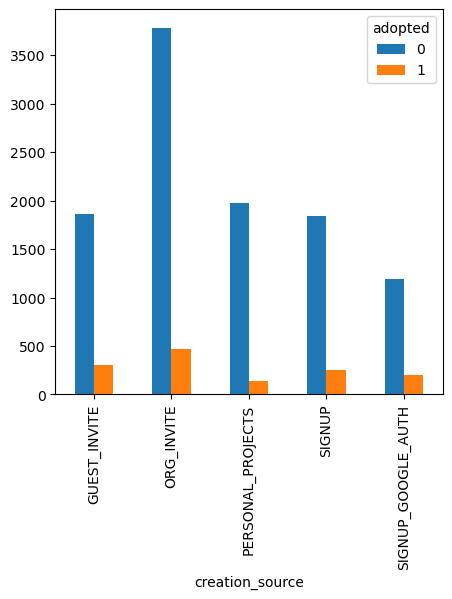

In [16]:
ax = users.groupby('adopted')['creation_source'].value_counts().unstack(0).plot(kind='bar', figsize=(5,5))
plt.show()

In [17]:
def percent_adoption_by_group(df, groupby_feature):
    feature_categories = []
    percents = []
    for category, group in df.groupby(groupby_feature):
        feature_categories.append(category)
        value_counts = list(group.adopted.value_counts())
        percent = 100 * (value_counts[1] / (value_counts[0] + value_counts[1]))
        percents.append(round(percent, 2))
    
    percent_adoption_df = pd.DataFrame({'feature':feature_categories, '% adoption':percents})
    sns.barplot(data=percent_adoption_df.sort_values('% adoption'), x='feature', y='% adoption')
    plt.xticks(rotation=90)
    plt.xlabel(groupby_feature)
    plt.show()

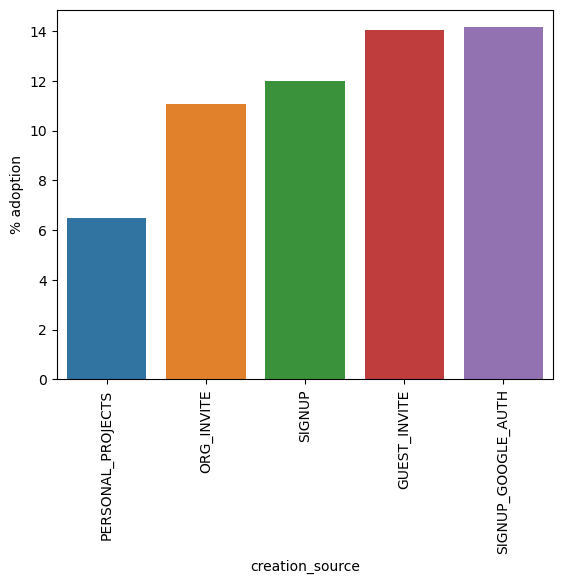

In [18]:
percent_adoption_by_group(users, 'creation_source')

We can see from that this that it seems that people who using the program for personal projects are the least likely to adopt it. 

#### Mailing List

In [19]:
print(users.opted_in_to_mailing_list.nunique())
print(users.opted_in_to_mailing_list.value_counts())

2
opted_in_to_mailing_list
0    9006
1    2994
Name: count, dtype: int64


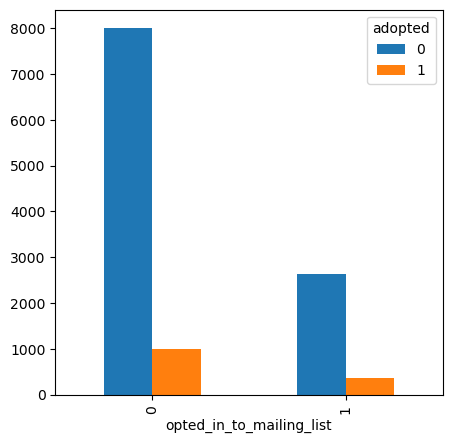

In [20]:
ax = users.groupby('adopted')['opted_in_to_mailing_list'].value_counts().unstack(0).plot(kind='bar', 
                                                                                         figsize=(5,5))
plt.show()

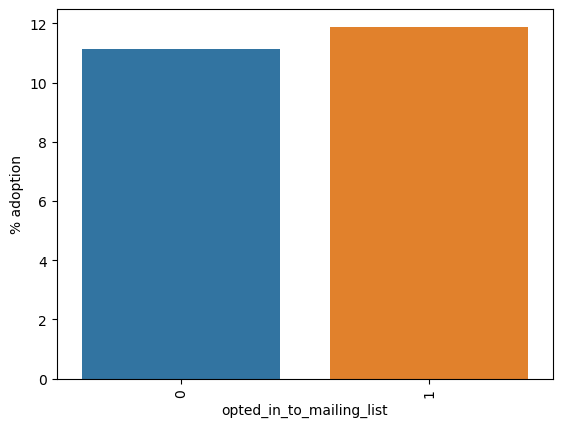

In [21]:
percent_adoption_by_group(users, 'opted_in_to_mailing_list')

Although we can see that many more users do not opt in to the mailing list, it looks like roughly the same percent of those that opt in and those that do not opt in become adopted users. Does not appear to have a strong correlation at this point. 

#### Marketing Drip

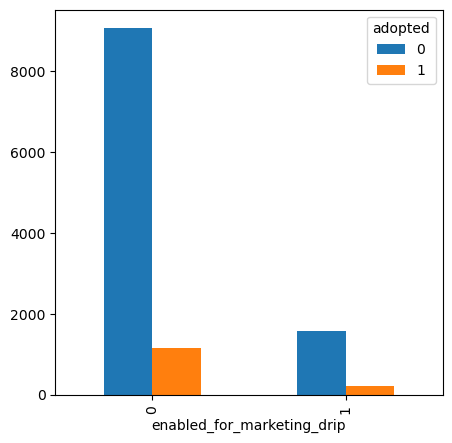

In [22]:
ax = users.groupby('adopted')['enabled_for_marketing_drip'].value_counts().unstack(0).plot(kind='bar', 
                                                                                         figsize=(5,5))
plt.show()

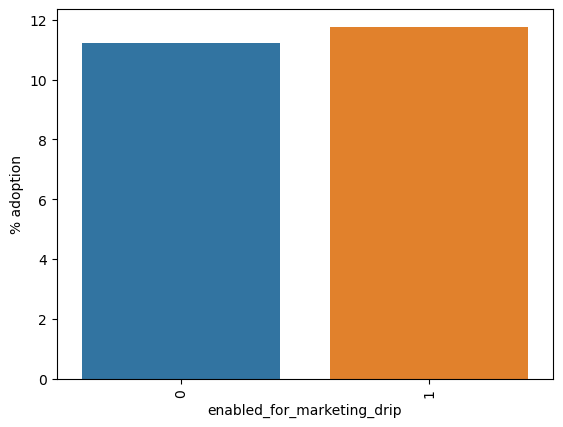

In [23]:
percent_adoption_by_group(users, 'enabled_for_marketing_drip')

Very similar conclusion here as for the mailing list. Only very slightly a higher percentage of users enabled for marketing have adopted the program. 

#### Organization ID & Invited by User ID

In [24]:
print(users.org_id.nunique())

417


In [25]:
print(users.invited_by_user_id.nunique())

2564


#### Length of user engagement

In [26]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [27]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)


In [29]:
history = []
for index,row in users.iterrows():
    start_date = row['creation_time']
    last_use_date = row['last_session_creation_time']
    days = (last_use_date - start_date).days
    history.append(days)
users['history'] = history

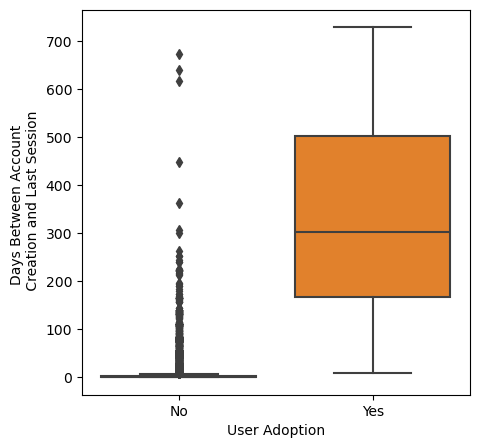

In [44]:
plt.figure(figsize=(5,5))
sns.boxplot(data=users, x='adopted', y='history')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('User Adoption')
plt.ylabel('Days Between Account \n Creation and Last Session')
plt.show()

We can see here a fairly significant difference between the two categories! Seems like users who have a longer period of time between creating their account and their most recent login date are more likely to have adopted the program. 

### Modeling

I am now going to build a vanilla random forest classifier to analyze feature importance. 

In [31]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,history
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5.0


In [32]:
users = pd.get_dummies(data=users, columns=['creation_source'], dtype='int')
users.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,history,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,1,136.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240.0,0,5.0,1,0,0,0,0


In [33]:
#let's just drop the rows that have no information for history 

users = users.dropna(subset=['history'])
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8823 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   object_id                           8823 non-null   int64         
 1   creation_time                       8823 non-null   datetime64[ns]
 2   name                                8823 non-null   object        
 3   email                               8823 non-null   object        
 4   last_session_creation_time          8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list            8823 non-null   int64         
 6   enabled_for_marketing_drip          8823 non-null   int64         
 7   org_id                              8823 non-null   int64         
 8   invited_by_user_id                  4776 non-null   float64       
 9   adopted                             8823 non-null   int64         
 10  history                     

In [34]:
features = users.drop(columns=['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 
                               'adopted', 'org_id','invited_by_user_id'], axis='columns')

target = users[['adopted']]
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8823 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            8823 non-null   int64  
 1   enabled_for_marketing_drip          8823 non-null   int64  
 2   history                             8823 non-null   float64
 3   creation_source_GUEST_INVITE        8823 non-null   int64  
 4   creation_source_ORG_INVITE          8823 non-null   int64  
 5   creation_source_PERSONAL_PROJECTS   8823 non-null   int64  
 6   creation_source_SIGNUP              8823 non-null   int64  
 7   creation_source_SIGNUP_GOOGLE_AUTH  8823 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 620.4 KB


In [35]:
from sklearn.model_selection import train_test_split

X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6617, 8)
(2206, 8)
(6617, 1)
(2206, 1)


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [37]:
from sklearn.metrics import classification_report

y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds, target_names=['not_adopted', 'adopted']))

              precision    recall  f1-score   support

 not_adopted       0.97      0.97      0.97      1866
     adopted       0.86      0.84      0.85       340

    accuracy                           0.95      2206
   macro avg       0.92      0.91      0.91      2206
weighted avg       0.95      0.95      0.95      2206



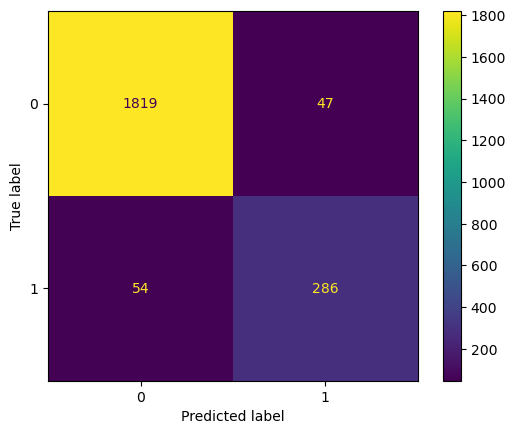

In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

We can see that our model has a pretty decent accuracy and a decent f1-score for both categories. It seems to struggle a bit more with users that have 'adopted' the program, which makes sense since there are fewer examples in this category in general. 

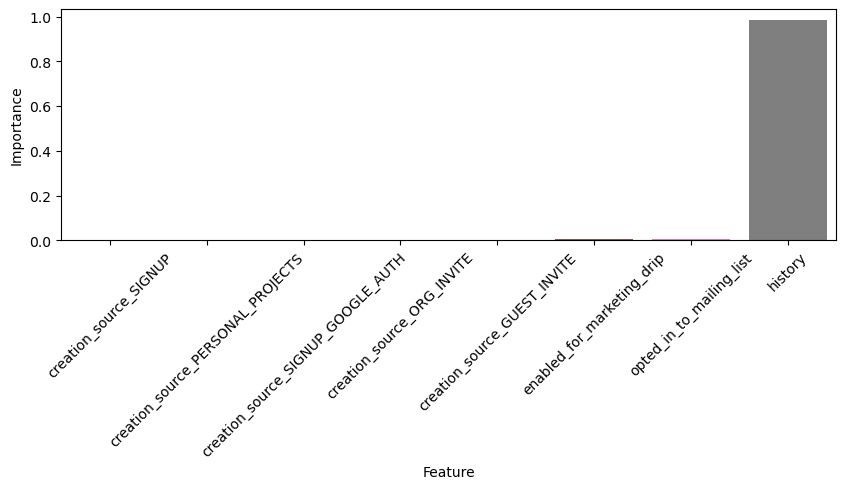

In [51]:
feature_imp = pd.DataFrame({'Importance':list(model.feature_importances_), 'Feature':list(features.columns)})
#feature_imp.head()

plt.figure(figsize=(10,3))
sns.barplot(data=feature_imp.sort_values('Importance'), x='Feature', y='Importance')
plt.xticks(rotation=45)
plt.show()

### Feature Importance

We can see from this that our model strongly believes that user history is the biggest indication of whether or not they will adopt the program!